# Goal : The goal is to create a Machine Learning model that can forecast the price of a specific house based on market pricing while taking various "features" into account.

Dataset Link - https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

Data description : Data has information on the price of a house based on certain features.
The cost or current market value of a home is divided by the floor area of the home to get the average price per square foot.

# Importing Data and collection of basic information

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
os.getcwd()

'C:\\Users\\SAYALI\\Python Practice\\ML_projects\\House Price Detection'

In [7]:
data=pd.read_csv("E:\ML Projects\Projects\House Price Prediction\Dataset\Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
data.shape

(13320, 9)

In [10]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [11]:
data["area_type"].groupby(data["area_type"]).count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Assume that some of the features aren't required.

In [12]:
data.drop(["area_type","availability","society","balcony"],axis="columns",inplace=True)

In [13]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

Handling missing values

In [14]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
data["bath"].fillna(data["bath"].mean(),inplace=True)
data.dropna(inplace=True)

In [16]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
data["BHK"]=data["size"].apply(lambda x: int(x.split()[0]))

In [19]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
data["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
data[data["BHK"]>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [22]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
data[~data["total_sqft"].apply(to_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.00000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.00000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.00000,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.69261,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.00000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.00000,63.770,2


In [25]:
def convert_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
convert_to_num("2100 - 2850")

2475.0

In [27]:
convert_to_num("2273")

2273.0

In [28]:
convert_to_num("34.46Sq. Meter")

In [29]:
data["total_sqft"]=data["total_sqft"].apply(convert_to_num)

In [30]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

# Feature Engineering

In [32]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [33]:
data["location"]=data["location"].apply(lambda x: x.strip())

In [34]:
location_satates=data["location"].groupby(data["location"]).count().sort_values(ascending=False)

In [35]:
location_stats_less_than_10=location_satates[location_satates<=10]

In [36]:
location_stats_less_than_10.head()

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
Name: location, dtype: int64

In [40]:
data1=data.copy()

In [41]:
data1["location"]=data["location"].apply(lambda x:"other" if x in location_stats_less_than_10 else x)

In [43]:
data1["location"].nunique()

242

In [44]:
data1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [47]:
data1["price/sqft"]=data["price"]*100000/data["total_sqft"]

In [48]:
data1.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Handle Outliers

In [65]:
data1[data1["total_sqft"]/data["BHK"]<300]


,location,size,total_sqft,bath,price,BHK,price/sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [66]:
data1.shape

(13303, 7)

In [70]:
data2=data1[~(data1["total_sqft"]/data["BHK"]<300)]

In [71]:
data2.shape

(12559, 7)

In [72]:
data2["price/sqft"].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price/sqft, dtype: float64

Function to remove observations which are not belongs to 1SD

In [81]:
def remove_outliers(data):
    data_out=pd.DataFrame()
    for key , sub_data in data.groupby("location"):
        m=np.mean(sub_data["price/sqft"])
        std=np.std(sub_data["price/sqft"])
        reduced_data=sub_data[(sub_data["price/sqft"]>(m-std)) & (sub_data["price/sqft"]<(m+std))]
        data_out=pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out


In [82]:
data3=remove_outliers(data2)
data3.shape

(10286, 7)

In [83]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Check Property price of 3BHK>2BHK

In [84]:
def plot_scatter(data,location):
    bhk2=data[(data.location==location) & (data.BHK==2)]
    bhk3=data[(data.location==location) & (data.BHK==3)]
    plt.scatter(bhk2["total_sqft"],bhk2["price"],color="blue",marker="+",label="BHK2")
    plt.scatter(bhk3["total_sqft"],bhk3["price"],color="red",marker="*",label="BHK3")
    plt.xlabel("Total_sqft")
    plt.ylabel("price")
    plt.title("Location")
    plt.legend()
    
      

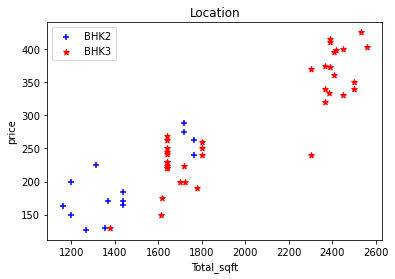

In [85]:
plot_scatter(data3,"Rajaji Nagar")

In [91]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_data in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_data in location_data.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_data["price/sqft"]),
                'std': np.std(bhk_data["price/sqft"]),
                'count': bhk_data.shape[0]
            }
        for bhk, bhk_data in location_data.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data["price/sqft"]<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')


In [92]:
data4=remove_bhk_outliers(data3)
data4.shape

(7353, 7)

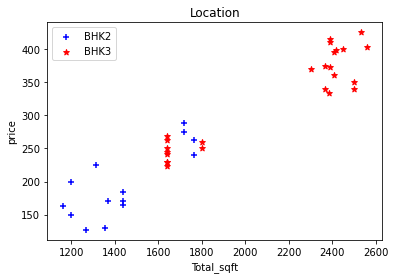

In [93]:
plot_scatter(data4,"Rajaji Nagar")

Histogram

In [94]:
data4.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Frequency')

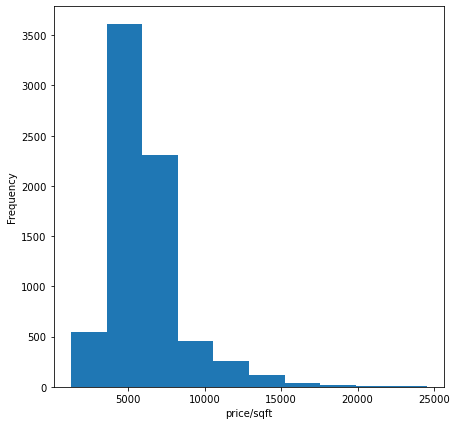

In [97]:
plt.figure(figsize=[7,7])
plt.hist(data4["price/sqft"])
plt.xlabel("price/sqft")
plt.ylabel("Frequency")

In [99]:
data["bath"].unique()

array([ 2.        ,  5.        ,  3.        ,  4.        ,  6.        ,
        1.        ,  9.        ,  2.69260965,  8.        ,  7.        ,
       11.        , 10.        , 14.        , 27.        , 12.        ,
       16.        , 40.        , 15.        , 13.        , 18.        ])

In [100]:
data[data["bath"]>data["BHK"]+2]

,location,size,total_sqft,bath,price,BHK
1078,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9
1953,KR Puram,8 Bedroom,1200.0,12.0,110.0,8
1979,Hongasandra,8 Bedroom,990.0,12.0,120.0,8
2620,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5
6937,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4
8106,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8
9974,Sector 1 HSR Layout,3 Bedroom,2400.0,6.0,775.0,3
9990,Doddakannelli,6 Bedroom,1200.0,9.0,122.0,6


In [101]:
data5=data4[data4["bath"]<data4["BHK"]+2]

In [103]:
data5.shape

(7275, 7)

In [104]:
data5.head()

,location,size,total_sqft,bath,price,BHK,price/sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [105]:
input=data5.drop(["size","price/sqft"],axis="columns")

In [106]:
input.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [108]:
dummies=pd.get_dummies(input["location"])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
input=pd.concat([input.drop("location",axis="columns"),dummies.drop("other",axis="columns")],axis="columns")
input.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
x=input.drop("price",axis="columns")
c=["total_sqft","bath","BHK"]
X=input[c]
X.head()

,total_sqft,bath,BHK
0,2850.0,4.0,4
1,1630.0,3.0,3
2,1875.0,2.0,3
3,1200.0,2.0,3
4,1235.0,2.0,2


In [112]:
y=input.price

# Model Building

Linear Regression


In [114]:
from sklearn.model_selection import train_test_split

In [180]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
LR=LinearRegression()

In [183]:
LR.fit(x_train,y_train)

LinearRegression()

In [184]:
LR.score(x_test,y_test)

0.6958365142633252

With Cross-Validation

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [128]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [185]:
print(cross_val_score(LinearRegression(),X,y,cv=cv))

[0.69527249 0.68555949 0.66357063 0.6776742  0.65722358]


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

In [187]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.675860,{'normalize': False}
1,lasso,0.678244,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.648099,"{'criterion': 'mse', 'splitter': 'random'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.


# Prediction

In [188]:
X.columns
X.head()

,total_sqft,bath,BHK
0,2850.0,4.0,4
1,1630.0,3.0,3
2,1875.0,2.0,3
3,1200.0,2.0,3
4,1235.0,2.0,2


In [196]:
print(LR.predict([[1875,2,3]]))

[124.77365801]


In [194]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10277     70.0
10278    200.0
10281    110.0
10282     26.0
10285    400.0
Name: price, Length: 7275, dtype: float64

# Export Model

In [197]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(LR,f)